In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [32]:
import loaders

city_ref = 'grenoble'
bbox=[45.1217, 5.6161, 45.2242, 5.84444]

geo_graph = loaders.load_graph(city_ref, bbox)
pois_df = loaders.load_pois(city_ref, bbox)
centrality_df = loaders.load_centrality(city_ref, geo_graph)
kde_df = loaders.load_kde(city_ref, geo_graph, pois_df)

Querying locally for `['pois']`
Found ['pois'] stored locally
Querying locally for `['centrality']`
Found ['centrality'] stored locally
Querying locally for `['kde']`
Found ['kde'] stored locally


Querying locally for `['nodes', 'edges']`
Found ['nodes', 'edges'] stored locally


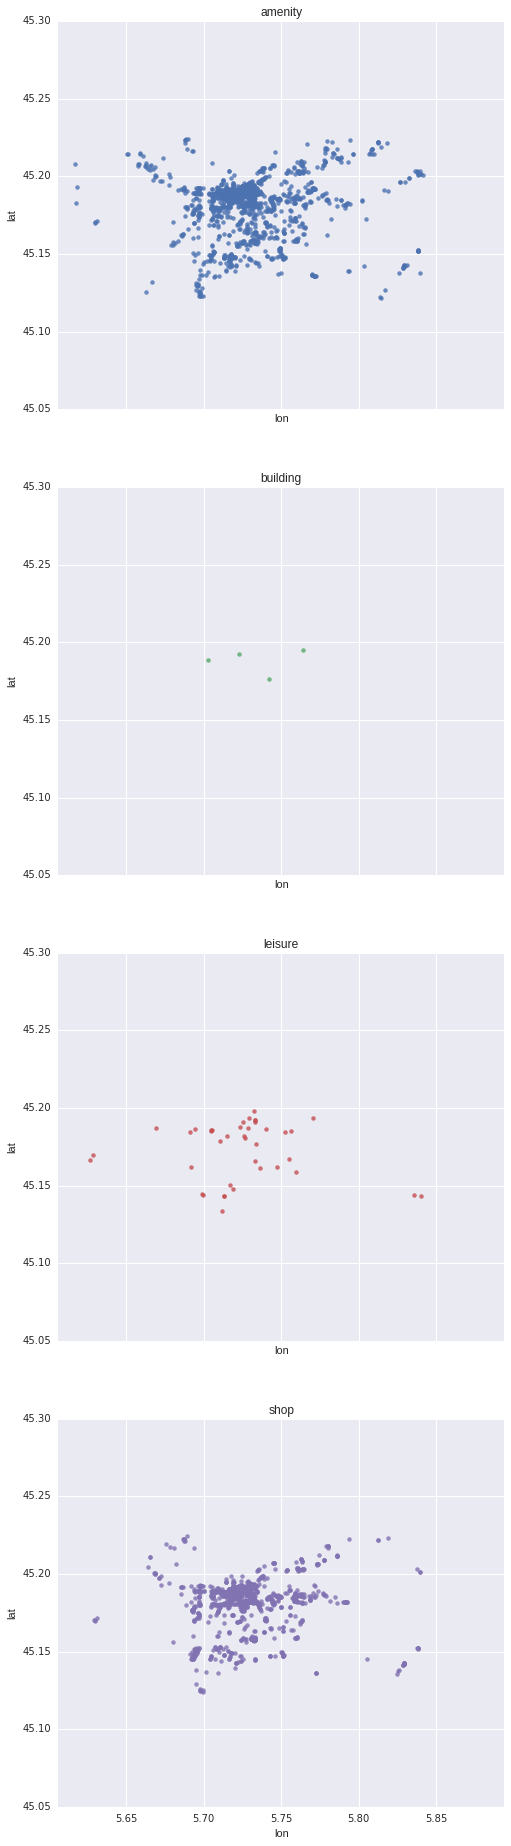

In [36]:
import plots

%matplotlib inline
plots.pois_scatter(pois_df)

In [36]:
kde_df.head()

             amenity  building   landuse   leisure      shop
1409886896 -1.839310 -1.839343 -1.839016 -1.839301 -1.839098
1108657    -1.839463 -1.839530 -1.838225 -1.839431 -1.839205
482312237  -1.839037 -1.838945 -1.840198 -1.839220 -1.838871
321355830  -1.842337 -1.841669 -1.848810 -1.843492 -1.842298
1106575417 -1.839008 -1.838913 -1.838314 -1.839302 -1.838726

In [37]:
import pandas as pd

# TODO: automatize this in some module

centrality_kde_df = pd.concat([
    pd.DataFrame({ key: value for (key, value) in zip(kde_df.columns, list(map(kde_df.__getitem__, kde_df.columns))) }),
    centrality_df], axis=1, keys=['kde', 'centrality'])
centrality_kde_df.head()

             kde                                centrality                    
         amenity  building   leisure      shop betweenness closeness    degree
124550 -1.838512 -1.838382 -1.838814 -1.838294    0.000000  0.013931  0.000239
124551 -1.838493 -1.838355 -1.838810 -1.838277    0.000062  0.013977  0.000358
124552 -1.838490 -1.838349 -1.838809 -1.838277    0.003265  0.014027  0.000358
124553 -1.838506 -1.838373 -1.838812 -1.838292    0.000541  0.014235  0.000358
124554 -1.838704 -1.838637 -1.838895 -1.838479    0.003268  0.015433  0.000358

In [38]:
# TODO: automatize this in some module
centrality_kde_corr = centrality_kde_df.corr().xs('kde', level=0).xs('centrality', level=0, axis=1)
centrality_kde_corr

          betweenness  closeness    degree
amenity      0.157639   0.629709  0.204715
building     0.158290   0.614150  0.200775
leisure      0.151903   0.630852  0.203295
shop         0.155893   0.630623  0.204884

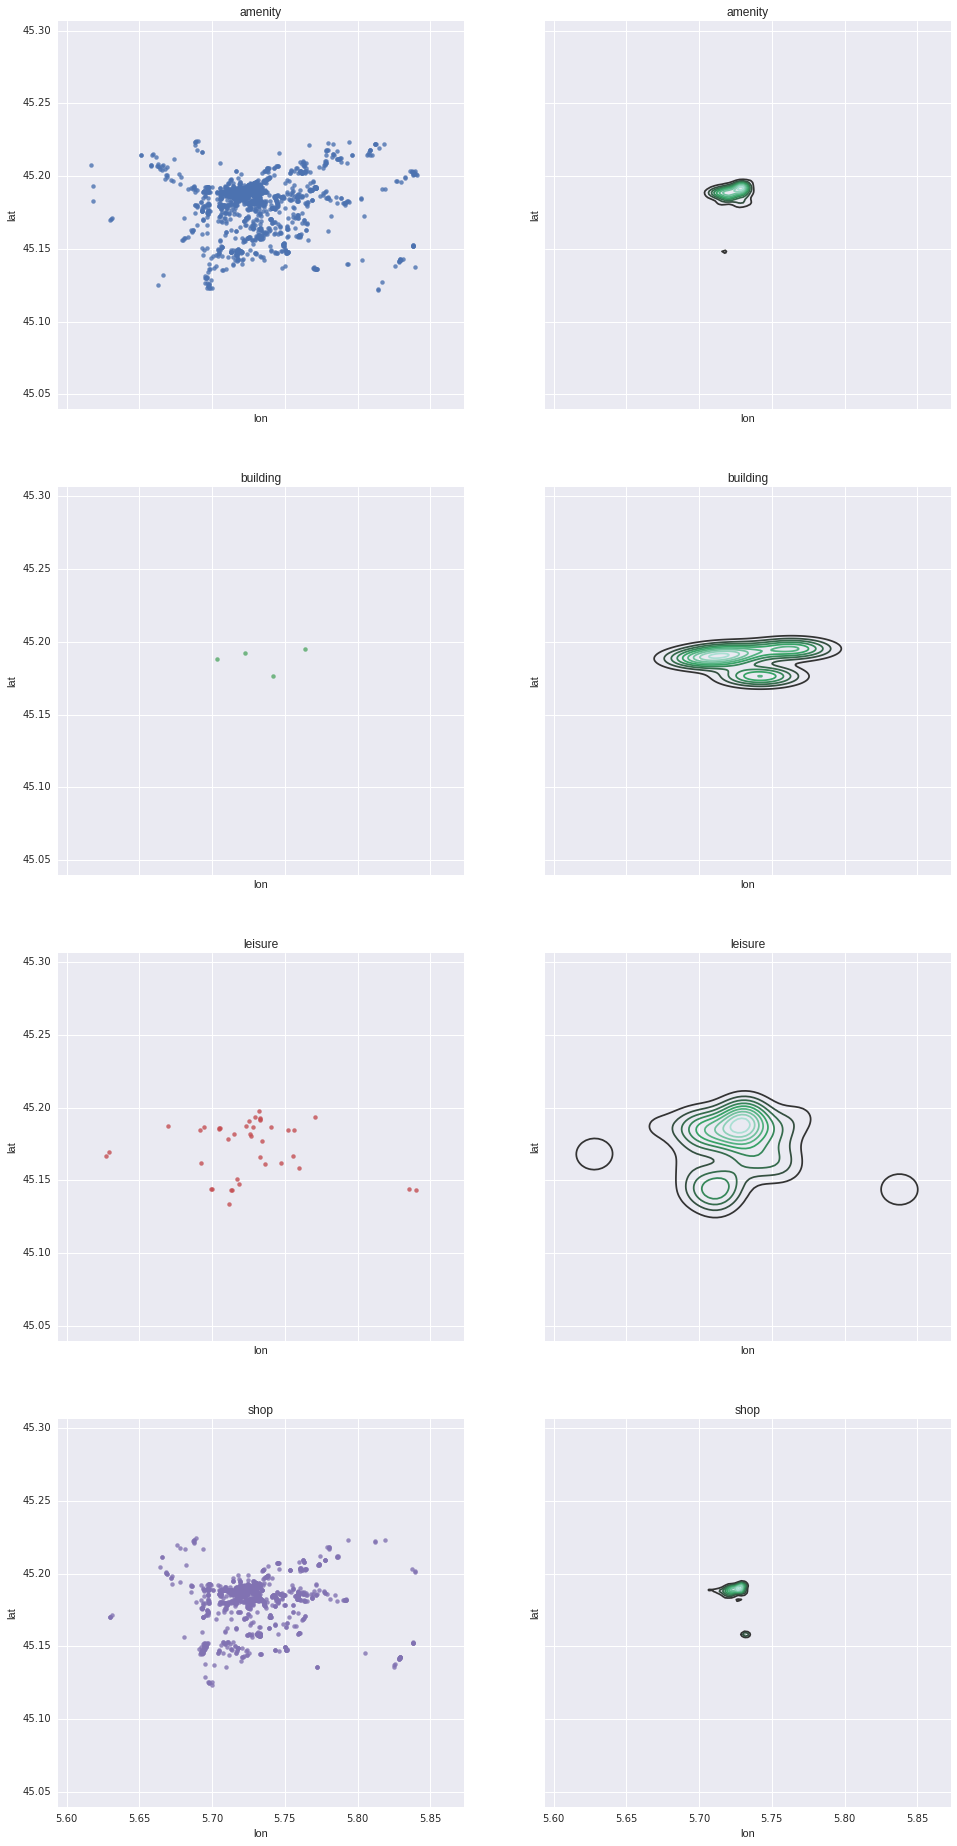

In [44]:
plots.pois_scatter_kde(pois_df, kde_df)

In [47]:
# TODO: create method for this in plots.py
import seaborn as sns

%matplotlib qt

cmap = plt.get_cmap('jet')

for centrality_label in centrality_df:
    for category_label, category_ser in pois_df.groupby(by=['key']):
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_title(centrality_label + ' vs ' + category_label)
        sns.kdeplot(category_ser['lon'], category_ser['lat'], ax=ax, legend=True, shade=True)
        geo_graph.plot(ax, node_color = [centrality_df[centrality_label][node.id] for node in geo_graph], node_size=20, cmap=cmap) # TODO: maybe hide edges